# The Magic and Mystery of Numbers. Martin Gardner - Scientific American

## The remarkable lore of prime numbers

### Stanislaw M. Ulam: display primes in spiral out from center makes diagonal line segments

In [1]:
import os
import sys
import time

import numpy as np

from IPython.display import display
import ipywidgets as widgets

sys.path.insert(1, '../src')
import numcolorpy as ncp

def get_primes_glyfic(n, n_start=1, prime_sym=" * ", not_prime_sym='   '):
    """ Usage: glyfic_str = get_primes_glyfic(n, n_start=1, prime_sym=" * ", not_prime_sym='   ') 
    printable string view of pattern of primes
    """
    glyfic_str = ''

    spiral_primes_mask, top_prime, min_prime, num_primes = get_spiral_primes_mask(n, n_start)
    actual_number_of_primes = spiral_primes_mask.sum()
    
    for k in range(0, spiral_primes_mask.shape[0]):
        r = spiral_primes_mask[k,:]
        row_str = ''
        for c in r:
            if c == 1:
                row_str += prime_sym
            else:
                row_str += not_prime_sym

        glyfic_str += row_str + '\n'
        
    return glyfic_str

def show_str_print_primes(n, n_start=1, sym=" * ", not_sym = '   '):
    print(get_primes_glyfic(n, n_start, sym, not_sym))
    
    
def get_prime_number_theorem_estimate(n):
    """ Usage: max_number_of_primes = get_prime_number_theorem_upper_limit(n) """
    
    return np.ceil(n / np.log(n))


def get_spiral_primes_mask(number_rows_cols=7, n_start=1, clockwise=True):
    """ Usage:
    spiral_primes_mask, top_prime, min_prime, num_primes = get_spiral_primes_mask(number_rows_cols, clockwise) 
    """
    spiral_primes_mask = spiral_raster_index(number_rows_cols, n_start, clockwise, just_primes=True)
    top_prime = spiral_primes_mask.max()
    min_prime = spiral_primes_mask.min()
    num_primes = (spiral_primes_mask != 0).sum()
    return spiral_primes_mask.astype(bool).astype(int), top_prime, min_prime, num_primes

def get_prime_divisors_list(x, fname):
    """  """
    max_divisor = x // np.sqrt(x)
    prime_divisors_array = np.loadtxt(fname, dtype=int)
    if x in prime_divisors_array:
        divisors_array = np.array(x)
    else:
        divisors_array = (prime_divisors_array[prime_divisors_array <= max_divisor]).astype(float)
    # option to append list here
    
    return divisors_array

def write_prime_divisors_list(fname, prime_divisors_array):
    """  """
    np.savetxt(fname, prime_divisors_array, fmt='%i')
    
def get_primes_array(max_prime):
    """  """
    array_size = (get_prime_number_theorem_estimate(max_prime) * 1.5).astype(int)
    primes_array = np.zeros(array_size)
    d = 3
    next_loc = 0
    while d < max_prime:
        if is_prime(d):
            primes_array[next_loc] = d
            next_loc += 1
        d += 2
            
    return primes_array[0:next_loc]

def append_primes_array(primes_array, max_prime):
    """  """
    d = primes_array[-1]
    next_loc = max(primes_array.shape)
    if max_prime <= d:
        return primes_array
    array_size = ((get_prime_number_theorem_estimate(max_prime) * 1.5) - next_loc).astype(int)
    appendix_array = np.zeros(array_size)
    apped_array = np.concatenate([primes_array, appendix_array])
    
    while d < max_prime:
        d += 2
        if is_prime(d):
            apped_array[next_loc] = d
            next_loc += 1
            
    return apped_array[0:next_loc-1]

# use the list
# def is_big_prime(x):

def is_prime(x):
    """ Usage: T_er_F = is_prime(x) """
    if x < 2 or np.mod(x, 2) == 0:
        return False
    sq = x // np.sqrt(x)
    if np.mod(sq, 2) == 0:
        sq -= 1
    for d in range(3, int(sq)+1, 2):
        if np.mod(x, d) == 0:
            return False
    return True


def spiral_raster_index(number_rows_cols=7, n_start=1, clockwise=True, just_primes=False):
    """ Usage: spiral_raster_matrix = spiral_raster_index(number_rows_cols) """
    number_rows_cols_is_even = False
    if np.mod(number_rows_cols, 2) == 0:
        number_rows_cols_is_even = True
        number_rows_cols += 1
        
    spir_ras_mat = np.zeros((number_rows_cols, number_rows_cols))
    r = number_rows_cols // 2
    if clockwise == False:
        rd = 1
    else:
        rd = -1
    c = number_rows_cols // 2
    cd = -1
    rows = [r]
    cols = [c]
    n = max(n_start - 1, 0)
    maxn = n + number_rows_cols**2

    while n < maxn and r >= 0 and r < number_rows_cols:
        for c in cols:
            n += 1
            if just_primes == False or is_prime(n):
                spir_ras_mat[r,c] = n
            
        cd *= (-1)
        c += cd
        cols.append(c)
        cols.reverse()
        
        if c < 0 or c >= number_rows_cols:
            break
        
        for r in rows:
            n += 1
            if just_primes == False or is_prime(n):
                spir_ras_mat[r,c] = n
            
        rd *= (-1)
        r += rd
        rows.append(r)
        rows.reverse()
        
    if number_rows_cols_is_even == True:
        if clockwise == True:
            spir_ras_mat = spir_ras_mat[1:, 1:]
        else:
            spir_ras_mat = spir_ras_mat[:-1, 1:]
            
    return spir_ras_mat.astype(int)    

center point - starting integer: 10000019

prime number theorem estimate: 9307 
9968 primes in 160000 integers: 10000019 to 10160018 
sparsity:  0.0623 
largest_found: 10160011 
smallest_prime: 0 
running time: 27.869499921798706


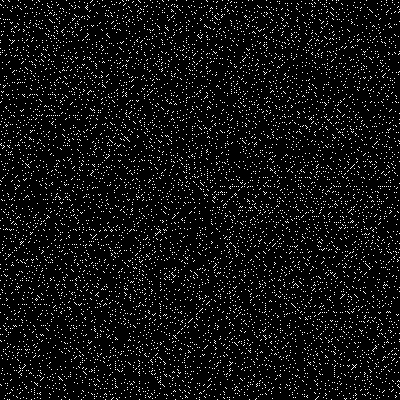

In [2]:
n = 400
number_of_integers = n**2

# WARNING:         n_start must be ODD else the computer will run for a very long time before crashing  ^(0)!(0)^
n_start = 10000001
while True:
    n_start += 2
    if is_prime(n_start):
        break

n_finish = n_start + number_of_integers - 1
print('center point - starting integer:', n_start)
print('')

t0 = time.time()
spiral_primes_mask, top_prime, min_prime, num_primes = get_spiral_primes_mask(n, n_start)

tt = time.time() - t0
sparsity = num_primes / number_of_integers
print('prime number theorem estimate: %i'%( 
      get_prime_number_theorem_estimate(n_finish) - get_prime_number_theorem_estimate(n_start) ), 
      '\n%i primes in %i integers: %i to %i'%(num_primes, number_of_integers, n_start, n_finish), 
      '\nsparsity: ', num_primes / n**2, 
      '\nlargest_found:', top_prime, 
      '\nsmallest_prime:', min_prime, 
      '\nrunning time:', tt)

spir_primes_Image = ncp.gray_mat(spiral_primes_mask)
display(spir_primes_Image)

In [3]:
show_str_print_primes(n=36, n_start=1, sym=" * ", not_sym = '   ')

       *                       *                                   *           *                 *          
                *     *                 *                                                     *             
                         *           *                 *                 *                             *    
                                  *     *           *     *                             *                 * 
 *     *                       *                             *                       *                 *    
          *     *                 *                 *           *     *                                   * 
             *           *                                   *     *                                        
    *     *     *     *                             *     *                 *                 *     *       
                                     *     *           *                 *           *                 *    
    *              

In [4]:
spiraled_mat = spiral_raster_index(number_rows_cols=17, n_start=1, clockwise=False, just_primes=False)
print(spiraled_mat)

[[257 256 255 254 253 252 251 250 249 248 247 246 245 244 243 242 241]
 [258 197 196 195 194 193 192 191 190 189 188 187 186 185 184 183 240]
 [259 198 145 144 143 142 141 140 139 138 137 136 135 134 133 182 239]
 [260 199 146 101 100  99  98  97  96  95  94  93  92  91 132 181 238]
 [261 200 147 102  65  64  63  62  61  60  59  58  57  90 131 180 237]
 [262 201 148 103  66  37  36  35  34  33  32  31  56  89 130 179 236]
 [263 202 149 104  67  38  17  16  15  14  13  30  55  88 129 178 235]
 [264 203 150 105  68  39  18   5   4   3  12  29  54  87 128 177 234]
 [265 204 151 106  69  40  19   6   1   2  11  28  53  86 127 176 233]
 [266 205 152 107  70  41  20   7   8   9  10  27  52  85 126 175 232]
 [267 206 153 108  71  42  21  22  23  24  25  26  51  84 125 174 231]
 [268 207 154 109  72  43  44  45  46  47  48  49  50  83 124 173 230]
 [269 208 155 110  73  74  75  76  77  78  79  80  81  82 123 172 229]
 [270 209 156 111 112 113 114 115 116 117 118 119 120 121 122 171 228]
 [271 

In [5]:
%whos

Variable                            Type        Data/Info
---------------------------------------------------------
append_primes_array                 function    <function append_primes_array at 0x10a74f2f0>
display                             function    <function display at 0x10475da60>
get_prime_divisors_list             function    <function get_prime_divisors_list at 0x10a74f158>
get_prime_number_theorem_estimate   function    <function get_prime_numbe<...>_estimate at 0x10a74aea0>
get_primes_array                    function    <function get_primes_array at 0x10a74f268>
get_primes_glyfic                   function    <function get_primes_glyfic at 0x108341510>
get_spiral_primes_mask              function    <function get_spiral_primes_mask at 0x10a74f048>
is_prime                            function    <function is_prime at 0x10a74f378>
min_prime                           int64       0
n                                   int         400
n_finish                            int  